In [775]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [776]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv('test.csv')

# EDA

In [777]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [778]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Higher class people have more chances of survival

In [779]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Females have more chance of survival

In [780]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [781]:
train_data['child']=[1 if x<18 else 0 for x in train_data['Age']]


In [782]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [783]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
child            int64
dtype: object

In [784]:
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [785]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
child          891
dtype: int64

### Children have more chance of survival

In [786]:
train_data[['child','Survived']].groupby(['child']).mean()

,Survived
child,
0,0.361183
1,0.539823


/home/kousik/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kousik/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


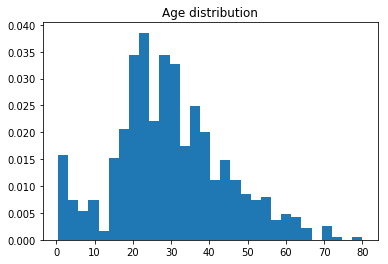

In [787]:
plt.hist(train_data['Age'],density=True,bins=30)
plt.title("Age distribution")
plt.show()

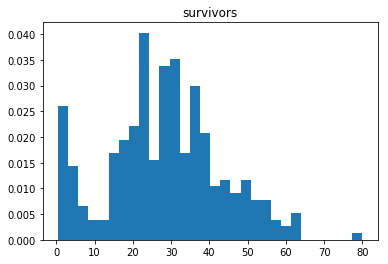

In [788]:
plt.hist(train_data[train_data['Survived']==1]['Age'],density=True,bins=30)
plt.title("survivors")
plt.show()

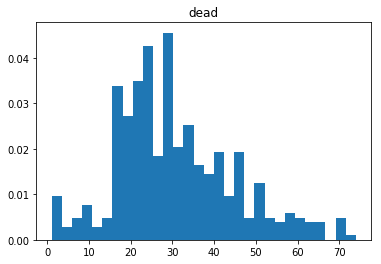

In [789]:
plt.hist(train_data[train_data['Survived']==0]['Age'],density=True,bins=30)
plt.title("dead")
plt.show()

### Name contains a title which may be useful for predicctions

In [790]:
train_data.Name=train_data.Name.str.split(',').apply(lambda x: x[1].split(".")[0].strip())
test_data.Name=test_data.Name.str.split(',').apply(lambda x: x[1].split(".")[0].strip())

In [791]:
counts=train_data.Name.value_counts()
train_data.Name=train_data.Name.apply(lambda x : "Rare" if counts[x]<=2 else x)
new_counts=train_data.Name.value_counts()
test_data.Name=test_data.Name.apply(lambda x : x if x in new_counts else "Rare")


In [792]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0


In [793]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S


### Instead of filling the median age for all null values we will us the corresponding sex, name, class variables to fill the correspondding group median

In [794]:
grouped_median_train=pd.concat([train_data.drop(["Survived","child"],axis=1),test_data],axis=0).groupby(['Sex','Pclass','Name']).median().reset_index()[['Sex', 'Pclass', 'Name', 'Age']]

In [795]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Name'] == row['Name']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


train_data['Age'] = train_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
test_data['Age'] = test_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

In [796]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
child          891
dtype: int64

### We use the first letter of the cabin and fill null values with 'U' for unknown
### We will also use the embarked values and fill nulls with 'S' (most common embarkment)
### We dummify both the columns

In [797]:
train_data["Cabin"]=train_data["Cabin"].fillna('U').apply(lambda x: x.strip()[0])
test_data["Cabin"]=test_data["Cabin"].fillna('U').apply(lambda x: x.strip()[0])
cabin_dummies=pd.get_dummies(train_data.Cabin,prefix="cabin")
train_data = pd.concat([train_data, cabin_dummies], axis=1)
cabin_dummies=pd.get_dummies(test_data.Cabin,prefix="cabin")
test_data = pd.concat([test_data, cabin_dummies], axis=1)

In [798]:
train_data.Embarked.fillna("S")
test_data.Embarked.fillna("S")
Embarked_dummies=pd.get_dummies(train_data.Embarked,prefix="Embarked")
train_data = pd.concat([train_data, Embarked_dummies], axis=1)
Embarked_dummies=pd.get_dummies(test_data.Embarked,prefix="Embarked")
test_data = pd.concat([test_data, Embarked_dummies], axis=1)

In [799]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'child', 'cabin_A',
       'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G',
       'cabin_T', 'cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [800]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_A', 'cabin_B', 'cabin_C',
       'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_U', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [801]:
test_data.shape

(418, 22)

### We dummify the name column which contains the titles

In [802]:
titles_dummies=pd.get_dummies(train_data["Name"], prefix='Title')
train_data = pd.concat([train_data, titles_dummies], axis=1)
titles_dummies=pd.get_dummies(test_data["Name"], prefix='Title')
test_data = pd.concat([test_data, titles_dummies], axis=1)

### We will also create a column with the first alphabetical string in the ticket number and dummify them as this was found to improve accuracy 

In [803]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [804]:
train_data['Ticket'] = train_data['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(train_data['Ticket'], prefix='Ticket')
train_data = pd.concat([train_data, tickets_dummies], axis=1)


In [805]:
test_data['Ticket'] = test_data['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(test_data['Ticket'], prefix='Ticket')
test_data = pd.concat([test_data, tickets_dummies], axis=1)


### We remove the non common columns in the train and test dataframe as these were created from the ticket number column

In [806]:
for col in train_data.columns:
    if col not in test_data.columns and col != "Survived":
        train_data.drop(col,axis=1,inplace=True)
for col in test_data.columns:
    if col not in train_data.columns:
        test_data.drop(col,axis=1,inplace=True)

In [807]:
train_data.shape

(891, 52)

In [808]:
test_data.shape

(418, 51)

In [809]:
train_data=train_data.drop(['PassengerId','Ticket','Cabin','Embarked','Name'],axis=1)
test_data=test_data.drop(['Ticket','Cabin','Embarked','Name'],axis=1)

### Adding a variable for family(sum of siblings and parents) and dummifying them into 3 categories : Single, small family, large family

In [810]:
train_data['Family']=train_data['SibSp']+train_data['Parch']+1
test_data['Family']=test_data['SibSp']+test_data['Parch']+1

In [811]:


# introducing other features based on the family size
train_data['Singleton'] = train_data['Family'].map(lambda s: 1 if s == 1 else 0)
train_data['SmallFamily'] = train_data['Family'].map(lambda s: 1 if 2 <= s <= 4 else 0)
train_data['LargeFamily'] = train_data['Family'].map(lambda s: 1 if 5 <= s else 0)
test_data['Singleton'] = test_data['Family'].map(lambda s: 1 if s == 1 else 0)
test_data['SmallFamily'] = test_data['Family'].map(lambda s: 1 if 2 <= s <= 4 else 0)
test_data['LargeFamily'] = test_data['Family'].map(lambda s: 1 if 5 <= s else 0)

In [812]:
train_data=train_data.drop(['SibSp','Parch','Family'],axis=1)
test_data=test_data.drop(['SibSp','Parch','Family'],axis=1)

### Mapping female to 1 and male to 0

In [813]:
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Binning the age and fare variable into 7 categories

In [814]:
train_data['age'] = pd.cut(train_data['Age'], [0, 5, 18,30,45,55,75,100], labels=[0,1,2,3,4,5,6])
test_data['age'] = pd.cut(test_data['Age'], [0, 5, 18,30,45,55,75,100], labels=[0,1,2,3,4,5,6])

In [815]:
train_data['fare'] = pd.cut(train_data['Fare'], [-1, 10, 18,40,60,90,180,1000], labels=[0,1,2,3,4,5,6])
test_data['fare'] = pd.cut(test_data['Fare'], [-1, 10, 18,40,60,90,180,1000], labels=[0,1,2,3,4,5,6])

In [816]:
train_data=train_data.drop(['Age','Fare'],axis=1)
test_data=test_data.drop(['Age','Fare'],axis=1)

# Modelling

In [817]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [818]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]

In [819]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

84.18

In [820]:
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


83.16

In [821]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.76

In [822]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

45.12

In [823]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.26

In [824]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.26

### As seen the decision tree and random forest shows the highest accuracy, note that though cross validation was not used and we may have overfit the model, the kaggle test scores give randomforest predictions the highest score 

Some null values remained due to train-test mismatch which are filled with mean values

In [825]:
test_data.age.fillna(2,inplace=True)
test_data.fare.fillna(1,inplace=True)

In [826]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'cabin_A', 'cabin_B', 'cabin_C',
       'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_U', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_Rev', 'Ticket_A4',
       'Ticket_A5', 'Ticket_C', 'Ticket_CA', 'Ticket_FC', 'Ticket_FCC',
       'Ticket_PC', 'Ticket_PP', 'Ticket_SC', 'Ticket_SCA4', 'Ticket_SCAH',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_STONO', 'Ticket_STONO2',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'Singleton', 'SmallFamily',
       'LargeFamily', 'age', 'fare'],
      dtype='object')

In [827]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'cabin_A', 'cabin_B', 'cabin_C', 'cabin_D',
       'cabin_E', 'cabin_F', 'cabin_G', 'cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Title_Rev', 'Ticket_A4', 'Ticket_A5',
       'Ticket_C', 'Ticket_CA', 'Ticket_FC', 'Ticket_FCC', 'Ticket_PC',
       'Ticket_PP', 'Ticket_SC', 'Ticket_SCA4', 'Ticket_SCAH',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_STONO', 'Ticket_STONO2',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'Singleton', 'SmallFamily',
       'LargeFamily', 'age', 'fare'],
      dtype='object')

### Predicting and creating the submission file

In [828]:
test_data['Survived']=random_forest.predict(test_data.drop("PassengerId",axis=1))

In [829]:
result=test_data[["PassengerId","Survived"]]

In [830]:
export_csv = result.to_csv ('submission.csv', index = None, header=True)